In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from keras import layers
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam

In [ ]:
H = 224
W = 224
batch_size = 32

train_path = "dataset/Train/"
test_path = "dataset/Test/"
val_path = "dataset/Validation/"

In [ ]:
number_of_class = len(glob(train_path + "/*"))
number_of_class

2

(-0.5, 4623.5, 3467.5, -0.5)

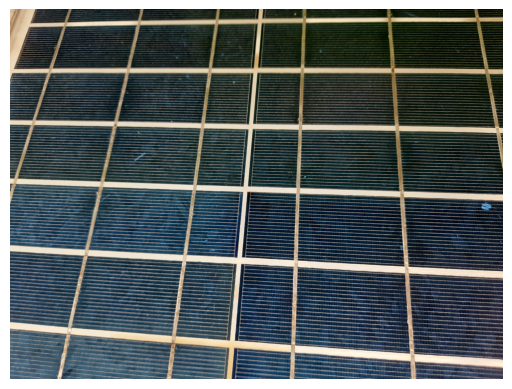

In [ ]:
img = load_img(train_path + "clean/20210917_152103.jpg")
plt.imshow(img)
plt.axis("off")

In [ ]:
datagen = ImageDataGenerator()

In [ ]:
class_names = ['Clean', 'Dirty']

In [ ]:
# Train data
train_generator = ImageDataGenerator().flow_from_directory(train_path, target_size = (224, 224)) # Target Size = resimlerin en boy degeri

Found 712 images belonging to 2 classes.


In [ ]:
# Test data
test_generator = ImageDataGenerator().flow_from_directory(test_path, target_size = (224, 224)) # Target Size = resimlerin en boy degeri

Found 100 images belonging to 2 classes.


In [ ]:
# Validation data
validation_generator = ImageDataGenerator().flow_from_directory(val_path, target_size = (224, 224)) # Target Size = resimlerin en boy degeri

Found 30 images belonging to 2 classes.


In [ ]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [ ]:
resnet_50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [ ]:
def trainModel(model, epochs, optimizer = "Adam", steps = 10):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]) # Spark_categorical_crossentropy sıkıntı cikariyor(Cozulecek.)
    return model.fit(train_generator, validation_data = validation_generator, epochs = epochs, batch_size = batch_size, steps_per_epoch=steps)

In [ ]:
# launch the training
model_history = trainModel(model = model, epochs = 20)

Epoch 1/20
10/10 [==============================] - 60s 6s/step - loss: 0.9294 - accuracy: 0.6062 - val_loss: 0.6793 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 50s 5s/step - loss: 0.7533 - accuracy: 0.6047 - val_loss: 0.6131 - val_accuracy: 0.7000
Epoch 3/20
10/10 [==============================] - 54s 5s/step - loss: 0.8013 - accuracy: 0.6062 - val_loss: 0.5251 - val_accuracy: 0.7667
Epoch 4/20
10/10 [==============================] - 55s 6s/step - loss: 0.6386 - accuracy: 0.6656 - val_loss: 0.4682 - val_accuracy: 0.8000
Epoch 5/20
10/10 [==============================] - 55s 5s/step - loss: 0.6128 - accuracy: 0.6781 - val_loss: 0.4169 - val_accuracy: 0.8333
Epoch 6/20
10/10 [==============================] - 55s 6s/step - loss: 0.5347 - accuracy: 0.7500 - val_loss: 0.3170 - val_accuracy: 0.9333
Epoch 7/20
10/10 [==============================] - 55s 5s/step - loss: 0.4420 - accuracy: 0.7969 - val_loss: 0.2298 - val_accuracy: 0.9333
Epoch 8/20
10/10 [==

## Model Evaluation

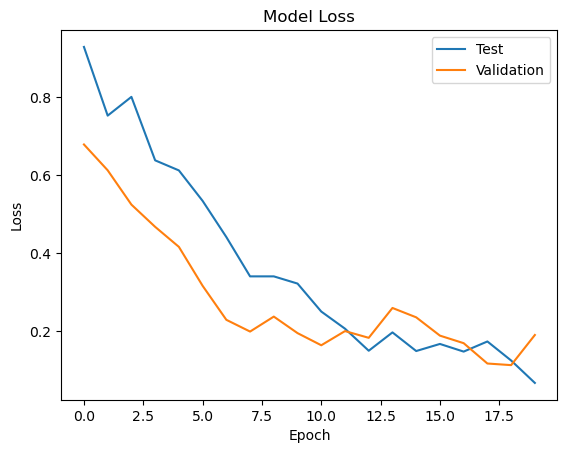

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

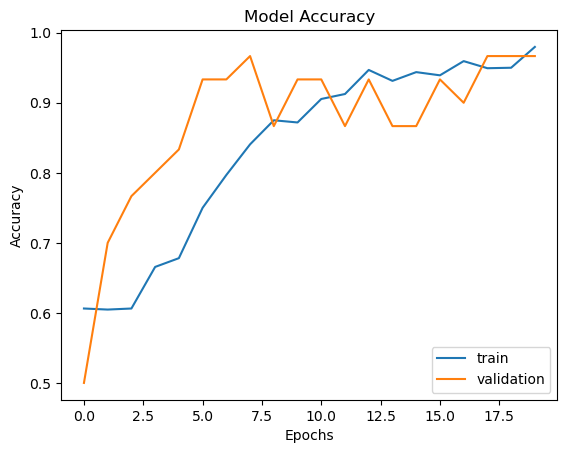

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc = 'lower right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

4/4 [==============================] - 15s 3s/step - loss: 0.1833 - accuracy: 0.9000
The test loss is:  0.18332044780254364
The best accuracy is:  89.99999761581421


## Manual Prediction

### Clean

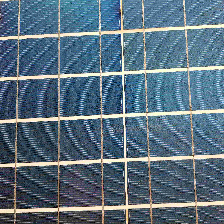

In [ ]:
clean_img = tf.keras.preprocessing.image.load_img('dataset/Test/clean/20210917_151224_3_11zon_37_11zon_29_11zon_26_11zon.jpg', target_size=(224, 224))
clean_array = tf.keras.preprocessing.image.img_to_array(clean_img)
clean_array = np.array([clean_array])
clean_img

In [ ]:
predictions = model.predict(clean_array)
print(predictions)
# ilk parametre (clean) 0.99

1/1 [==============================] - 0s 68ms/step
[[0.992735 0.007265]]


In [ ]:
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[0]


In [ ]:
# Tahmin edilen görüntünün sınıf ismi
class_names[class_id.item()]

'Clean'

### Dirty

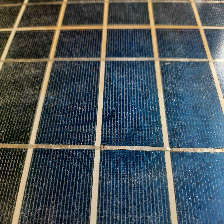

In [ ]:
dirty_img = tf.keras.preprocessing.image.load_img('dataset/Train/dirty/20210917_105444_36_11zon.jpg', target_size=(224, 224))
img_array2 = tf.keras.preprocessing.image.img_to_array(dirty_img)
img_array2 = np.array([img_array2])
dirty_img

In [ ]:
predictions = model.predict(img_array2)
print(predictions)
# ikinci parametre(dirty) 0.99

1/1 [==============================] - 0s 95ms/step
[[0.00227458 0.9977254 ]]


In [ ]:
class_id = np.argmax(predictions, axis = 1) # Hesapladigi en yuksek degerin indexi, 1 numaralı indeks = Dirty
print(class_id)

[1]
